<a href="https://colab.research.google.com/github/Narendra1508/Advanced-Project-2/blob/main/advanced_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title set working directory { display-mode: "form" }
%cd "/content/drive/My Drive/dataScience/projects/Advanced-Project-2/dataset"
# !pwd

/content/drive/My Drive/dataScience/projects/Advanced-Project-2/dataset


In [123]:
#@title Load required libraries and set visualization parameters
%%time
from __future__ import division, print_function

# operating system interfaces
import os

# to store objects as file
import pickle

# libraries for data storage using np array and panel data of pandas also used for scietific and statistical calculations
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime

# libraries for visaulization
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# for time series analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, ccf, grangercausalitytests

# Visualization settings
# This is a special style template for matplotlib, highly useful for visualizing time series data
# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)                                                  
color = sns.color_palette("Set1", 6)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
mpl.rcParams['lines.linewidth'] = 2

# update matplotlib rc parameters
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size 

params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

import warnings
warnings.filterwarnings('ignore')

CPU times: user 3.18 ms, sys: 22 µs, total: 3.2 ms
Wall time: 2.92 ms


# **Reading and pre-processing of the data**

In [4]:
# initialize parameters for file read
chunk_size = 10000
phase_angle_file = "phase-angle-1s_2019-09-01_2020-09-30.csv"
wind_energy_file = "wind-15m_2019-09-01_2020-09-30.csv"

In [5]:
#@title Read wind energy csv file into a dataframe { display-mode: "form" }
%%time
# read the wind energy csv as df
wind_energy_df = pd.read_csv(wind_energy_file, parse_dates = ['time'], keep_date_col = True)
wind_energy_df = wind_energy_df.assign(Date=wind_energy_df.time.dt.date, Time=wind_energy_df.time.dt.time)
wind_energy_df = wind_energy_df.set_index(['time'])
print("Wind energy data is loaded as dataframe")

# save the df as .pickle
wind_energy_pickle = open("wind_energy_df.pickle","wb")
pickle.dump(wind_energy_df, wind_energy_pickle)

print("Wind energy data is successfully saved as pickle file")

Wind energy data is loaded as dataframe
Wind energy data is successfully saved as pickle file
CPU times: user 143 ms, sys: 28.7 ms, total: 171 ms
Wall time: 4.02 s


In [17]:
wind_energy_df.head(2)

,Windenergie_Hochrechnung_50Hertz,Windenergie_Hochrechnung_Amprion,Windenergie_Hochrechnung_TenneT_TSO,Windenergie_Hochrechnung_TransnetBW,Windenergie_Prognose_50Hertz,Windenergie_Prognose_Amprion,Windenergie_Prognose_TenneT_TSO,Windenergie_Prognose_TransnetBW,Date,Time
time,,,,,,,,,,
2019-09-01 00:00:00,163.11,107,100.52,51.53,128.58,84,84.0,34.487,2019-09-01,00:00:00
2019-09-01 00:15:00,137.92,119,85.97,55.23,126.19,83,82.4,33.709,2019-09-01,00:15:00


In [18]:
#@title Calculating the total actual generated energy from all locations
#copy wind_energy_df and erase all columns
total_wind_energy_df = wind_energy_df.copy()[['Date', 'Time']]

# adding the generated energy from all locations
total_wind_energy_df['total_Hochrechnung'] = wind_energy_df[['Windenergie_Hochrechnung_50Hertz', 'Windenergie_Hochrechnung_Amprion',
                                                      'Windenergie_Hochrechnung_TenneT_TSO', 'Windenergie_Hochrechnung_TransnetBW']].sum(axis=1)

total_wind_energy_df['total_Prognose'] = wind_energy_df[['Windenergie_Prognose_50Hertz','Windenergie_Prognose_Amprion', 
                                                             'Windenergie_Prognose_TenneT_TSO','Windenergie_Prognose_TransnetBW',]].sum(axis=1)    

# save the df as .pickle
total_wind_energy_df_pickle = open("total_wind_energy_df.pickle","wb")
pickle.dump(total_wind_energy_df, total_wind_energy_df_pickle)
print("Saved the total_wind_energy_df dataframe as pickle file")

Saved the total_wind_energy_df dataframe as pickle file


In [20]:
#@title or read the actual total wind energy data from previously saved pickle file
total_wind_energy_df_pickle = open("total_wind_energy_df.pickle", "rb")
total_wind_energy_df = pickle.load(total_wind_energy_df_pickle)

In [21]:
total_wind_energy_df.head()

,Date,Time,total_Hochrechnung,total_Prognose
time,,,,
2019-09-01 00:00:00,2019-09-01,00:00:00,422.16,331.067
2019-09-01 00:15:00,2019-09-01,00:15:00,398.12,325.299
2019-09-01 00:30:00,2019-09-01,00:30:00,368.59,318.570
2019-09-01 00:45:00,2019-09-01,00:45:00,344.29,312.902
2019-09-01 01:00:00,2019-09-01,01:00:00,330.54,298.382


In [22]:
total_wind_energy_df.describe()

,total_Hochrechnung,total_Prognose
count,38008.000000,38008.000000
mean,420.168572,385.058477
std,388.719156,352.477543
min,0.000000,-87.800000
25%,136.087500,125.509750
50%,278.888000,265.459500
75%,591.136500,534.512500
max,1893.263000,1787.080000


CPU times: user 7 s, sys: 13.8 ms, total: 7.01 s
Wall time: 7.03 s


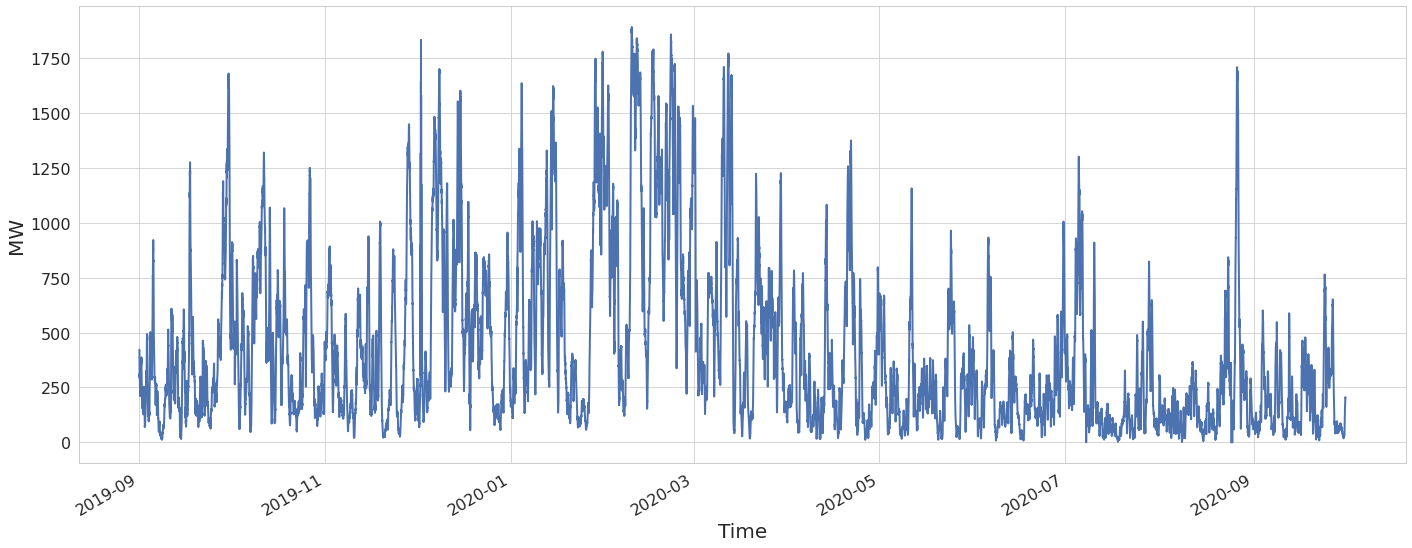

In [54]:
#@title Time Series of Total Hochrechnung
%%time
total_wind_energy_df['total_Hochrechnung'].plot(grid = True, figsize = (20, 8))
plt.xlabel('Time', fontsize = 20)
plt.ylabel('MW', fontsize = 20)
# plt.title("Time Series of Total Hochrechnung", fontsize = 24)
plt.savefig('total_wind_energy.png', dpi=600)
plt.tight_layout()

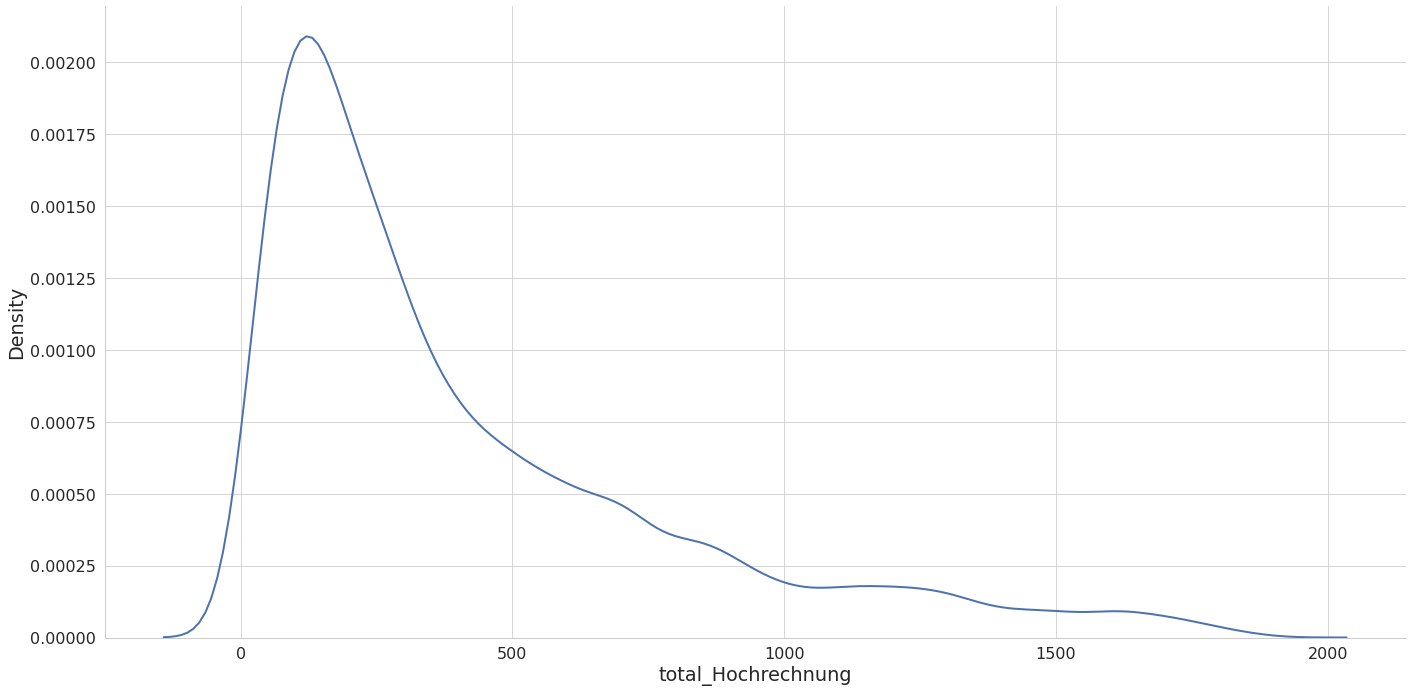

CPU times: user 715 ms, sys: 178 ms, total: 893 ms
Wall time: 708 ms


In [36]:
#@title Density plot of Total Hochrechnung
%%time
# instead of bins we can use binwidth=0.01
sns.displot(total_wind_energy_df, x="total_Hochrechnung", kind="kde", height=10, aspect=2)
# plt.title("Density plot of Total Hochrechnung", fontsize=16)
plt.show()

**Read Phase angle data**



---


**Points to be considered while understanding the phase angle data and pre processing.**

Consider two buses, with the sending bus voltage leading the receiving bus voltage by a phase angle δ = θ1 - θ2. They are connected by a short transmission line modeled by a single reactance, X. The real power P and reactive power Q absorbed at the receiving end are:

![picture](https://drive.google.com/uc?export=view&id=1yYcrcqe8htnDKRRwPI8tCjpiX5aSe0yU)

In the two-bus power equations above, it is the sinus of the phase difference determines real power flow, P. When the sending bus leads the receiving bus, real power will flow from sending to receiving (δ > 0 and P > 0). The opposite is true when the sending voltage lags the receiving voltage (δ < 0 and P < 0): power will flow from the "receiving" bus to the "sending" bus.


Therefore, we need to calculate the sin(δ) for each pair of buses (power stations) in our dataset.

In [38]:
# select the bus locations for calculations
bus1 = "Bremen"
bus2 = "Schondorf"

In [39]:
#@title Read the phase angle data (resampled into 15 minutes)
%%time
chunkTemp = []

for chunk in pd.read_csv(phase_angle_file, usecols = ("time", bus1, bus2) ,parse_dates = ['time'], keep_date_col = True, chunksize=chunk_size, iterator=True, low_memory=False):
    
    # read the csv in chunks and resample it to 15 minutes
    chunk = chunk.set_index(['time'])
    chunk["phase_diff"] = (chunk[bus1] - chunk[bus2])
    chunk["sin_delta"] = np.sin(np.deg2rad(chunk["phase_diff"]))
    chunk = chunk.resample('15 min').mean()
    chunk['dt'] = chunk.index
    chunkTemp.append(chunk) 

pw_angle_bremen_schondorf = pd.concat(chunkTemp)
# save the df as .pickle
pw_angle_bs = open("pw_angle_bremen_schondorf.pickle","wb")
pickle.dump(pw_angle_bremen_schondorf, pw_angle_bs)
print("Phase angle data resampled at 15 minutes is loaded and saved as a pickle file")

Phase angle data resampled at 15 minutes is loaded and saved as a pickle file
CPU times: user 55.5 s, sys: 2.25 s, total: 57.7 s
Wall time: 1min 6s


In [40]:
#@title or read the phase angle data from previously saved pickle file
wind_energy_pickle = open("wind_energy_df.pickle", "rb")
wind_energy_df = pickle.load(wind_energy_pickle)

In [45]:
#@title Time series visualization of phase angle data by Plotly
%%time
fig = px.line(x=pw_angle_bremen_schondorf.index, y=pw_angle_bremen_schondorf.sin_delta, title = 'bremen_schondorf sin(delta)')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

CPU times: user 1.5 s, sys: 79.5 ms, total: 1.58 s
Wall time: 2.06 s


In [47]:
#@title We need to consider the data starting from '2020-01-07' and impute the missing data thereafter
pw_angle_bremen_schondorf_2020 = pw_angle_bremen_schondorf['2020-01-07':]
pw_angle_bremen_schondorf_2020['sin_delta'] = pw_angle_bremen_schondorf_2020['sin_delta'].fillna(method='bfill')

In [51]:
pw_angle_bremen_schondorf_2020.head()

,Schondorf,Bremen,phase_diff,sin_delta,dt
time,,,,,
2020-01-07 00:00:00,181.410000,179.530000,-1.880000,0.100495,2020-01-07 00:00:00
2020-01-07 00:00:00,198.570000,201.050000,2.480000,0.105860,2020-01-07 00:00:00
2020-01-07 00:15:00,191.997778,194.125556,2.127778,0.092844,2020-01-07 00:15:00
2020-01-07 00:30:00,176.034444,176.132222,0.097778,0.099271,2020-01-07 00:30:00
2020-01-07 00:45:00,193.556667,193.010000,-0.546667,0.095014,2020-01-07 00:45:00


In [49]:
pw_angle_bremen_schondorf_2020.describe()

,Schondorf,Bremen,phase_diff,sin_delta
count,27777.000000,27786.000000,27777.000000,27786.000000
mean,179.458766,179.379588,-0.080090,-0.428855
std,15.193109,15.200755,11.960762,0.378746
min,31.950000,35.850000,-88.170000,-0.999913
25%,171.266667,171.192500,-5.168889,-0.750395
50%,179.507778,179.432222,-0.514444,-0.485006
75%,187.437778,187.436667,3.501111,-0.141431
max,321.210000,314.860000,238.840000,0.995455


CPU times: user 7.22 s, sys: 15.9 ms, total: 7.24 s
Wall time: 7.25 s


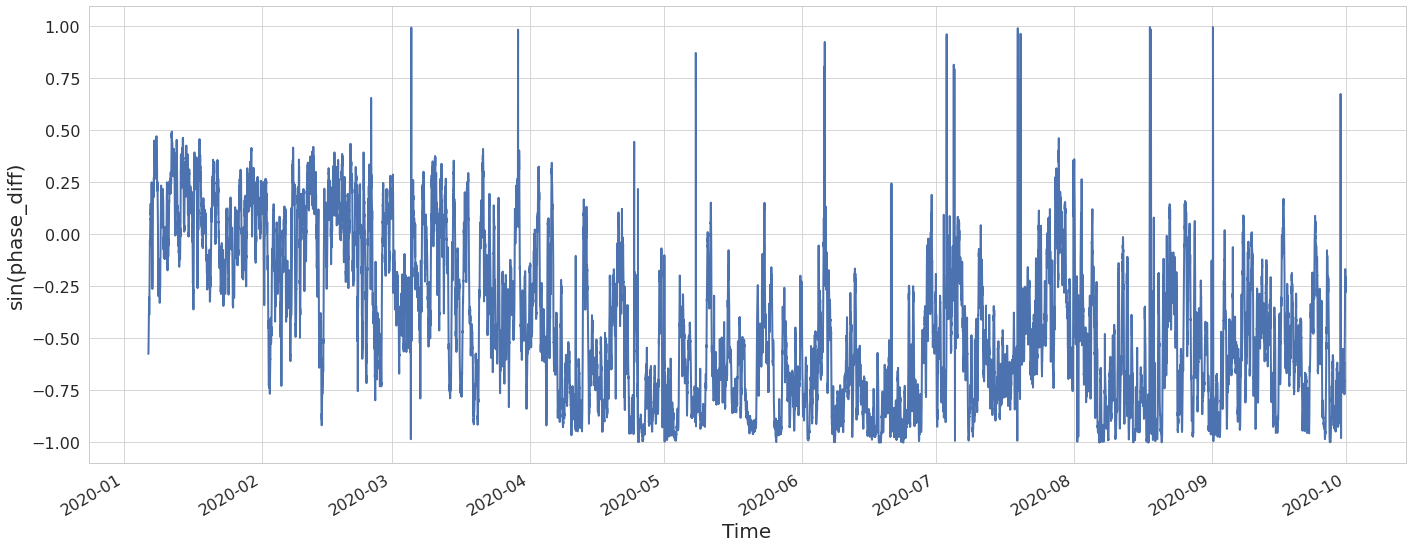

In [53]:
#@title Time series of sin(phase diff) after imputation
%%time
pw_angle_bremen_schondorf['sin_delta'].plot(grid = True, figsize = (20, 8))
plt.xlabel('Time', fontsize = 20)
plt.ylabel('sin(phase_diff)', fontsize = 20)
# plt.title("Time Series of Sin delta", fontsize = 24)
plt.savefig('sin_delta_time_series.png', dpi=600)
plt.tight_layout()

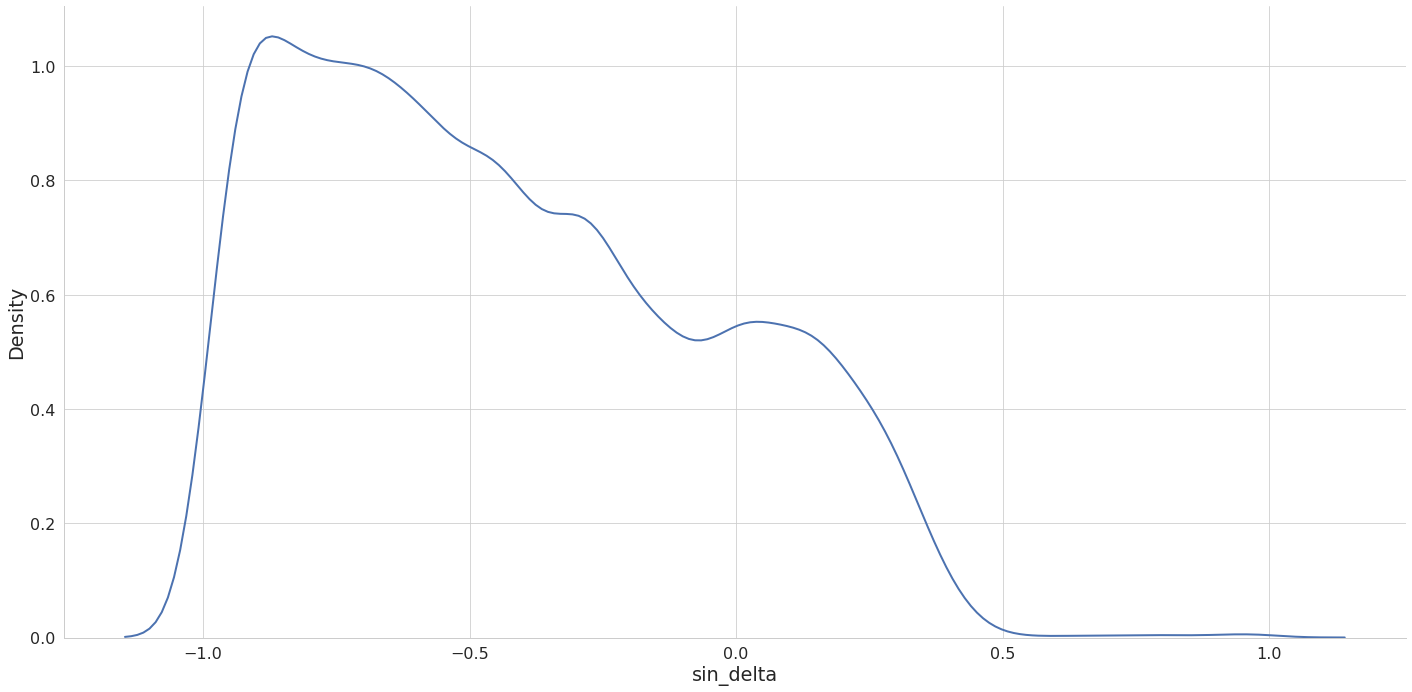

In [55]:
#@title Density plot of sin(phase diff)
# instead of bins we can use binwidth=0.01
sns.displot(pw_angle_bremen_schondorf, x="sin_delta", kind="kde", height=10, aspect=2)
plt.show()

# **Time Series Analysis**

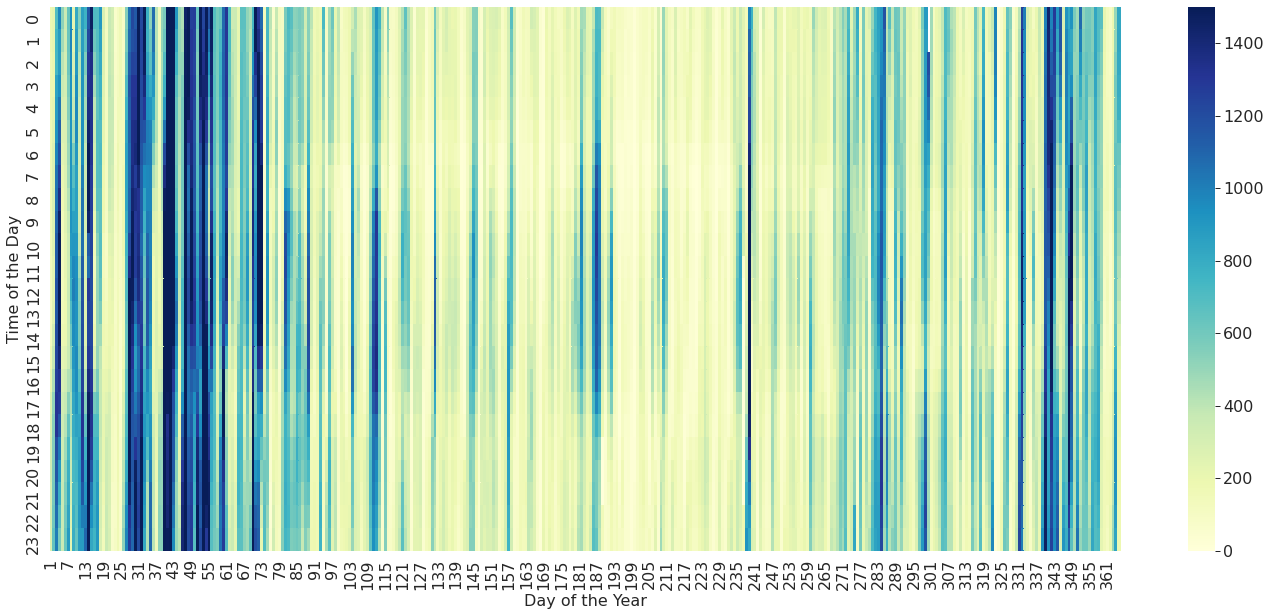

In [37]:
#@title Heat map of total wind energy
wind_heat_map_df = total_wind_energy_df.copy()
wind_heat_map_df['Day'] = [i.dayofyear for i in wind_heat_map_df.index]
wind_heat_map_df['hour'] = [i.hour for i in wind_heat_map_df.index]

# group by month and year, get the average
wind_heat_map_df = wind_heat_map_df.groupby(['Day', 'hour']).mean()

wind_heat_map_df = wind_heat_map_df['total_Hochrechnung'].unstack(level=0)
fig, ax = plt.subplots(figsize=(24, 10))
cmap = "YlGnBu"
sns.heatmap(wind_heat_map_df, cmap=cmap, vmax=1500)
plt.xlabel("Day of the Year", fontsize=16)
plt.ylabel("Time of the Day", fontsize=16)
# plt.title("Heat map of Total Hochrechnung for one year", fontsize=16)
plt.savefig('wind_energy_heat_map.png', dpi=600)
plt.show()

Time based heat maps are an easy way of understanding relative aggregates by date and time.

I think it's important to view behavior by time as the numbers are often very different when looking across time intervals such as year, month, day of the week, hour etc.  In the below visualization it can be understood that, wind energy generation is higher in Q1 and Q4 and less during rest of the year. It can be also be strongly supported by the avegrage wind speed data which as below.


Our observations could be well supported by weather data. 

[https://weather-and-climate.com/average-monthly-Wind-speed,bremen,Germany]

![picture](https://drive.google.com/uc?export=view&id=1rJ1p86xItUxOzaPveqTYMSHtRmoa8i9l)

On average, the most wind is seen in December - February.

On average, the least wind is seen in August - October.

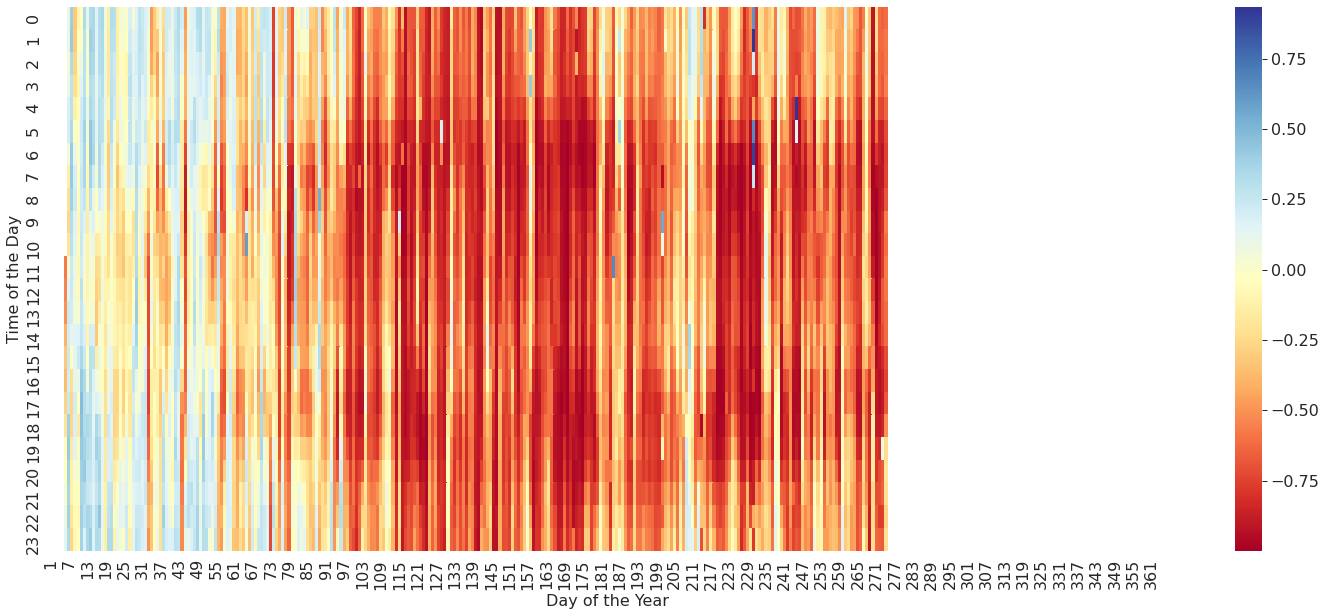

In [56]:
#@title Heat map of sin(phase_diff) of Bremen and Schondorf
pw_angle_heat_map_df = pw_angle_bremen_schondorf.copy()
pw_angle_heat_map_df['Day'] = [i.dayofyear for i in pw_angle_heat_map_df.index]
pw_angle_heat_map_df['hour'] = [i.hour for i in pw_angle_heat_map_df.index]

# group by month and year, get the average
pw_angle_heat_map_df = pw_angle_heat_map_df.groupby(['Day', 'hour']).mean()

pw_angle_heat_map_df = pw_angle_heat_map_df['sin_delta'].unstack(level=0)
fig, ax = plt.subplots(figsize=(25, 10))
# cmap = "YlGnBu"
cmap = "RdYlBu"
sns.heatmap(pw_angle_heat_map_df, cmap=cmap)
plt.xlabel("Day of the Year", fontsize=16)
plt.ylabel("Time of the Day", fontsize=16)
# plt.title("Heat map of sin(phase_diff) of Bremen and Schondorf for one year", fontsize=16)
plt.savefig('sin_delta_heat_map.png', dpi=600)
plt.show()

**Time series decomposition**

---

The following two structures are considered for basic decomposition models:

Additive:  = Trend + Seasonal + Residual

Multiplicative:  = Trend * Seasonal * Residual

The additive model is useful when the seasonal variation is relatively constant over time.

The multiplicative model is useful when the seasonal variation increases over time.

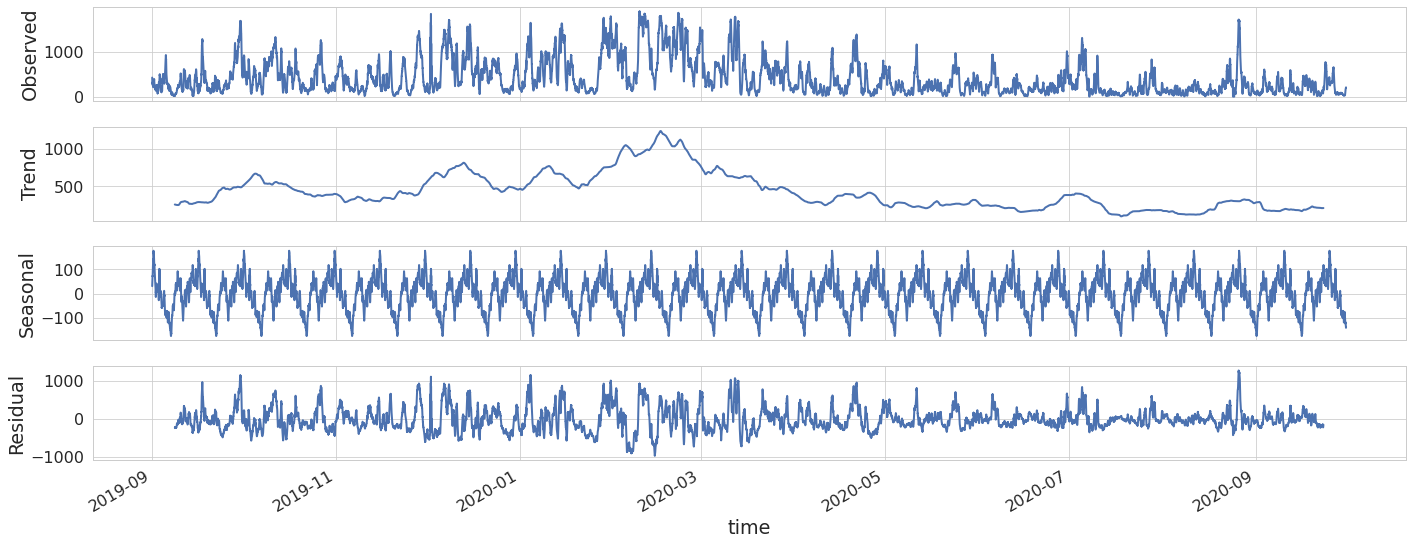

In [84]:
#@title Time series decomposition of total wind energy
# Decompose
# freq = 15*4*24 (for daily seasonality)
# refer https://robjhyndman.com/hyndsight/seasonal-periods/ for choosing frequency
res = sm.tsa.seasonal_decompose(total_wind_energy_df['total_Hochrechnung'], model = 'additive', freq=1440)
# Plot
mpl.rcParams['figure.figsize'] = (20, 8)
res.plot()
plt.savefig('decomposition_wind_energy.png', dpi=600)
plt.show()

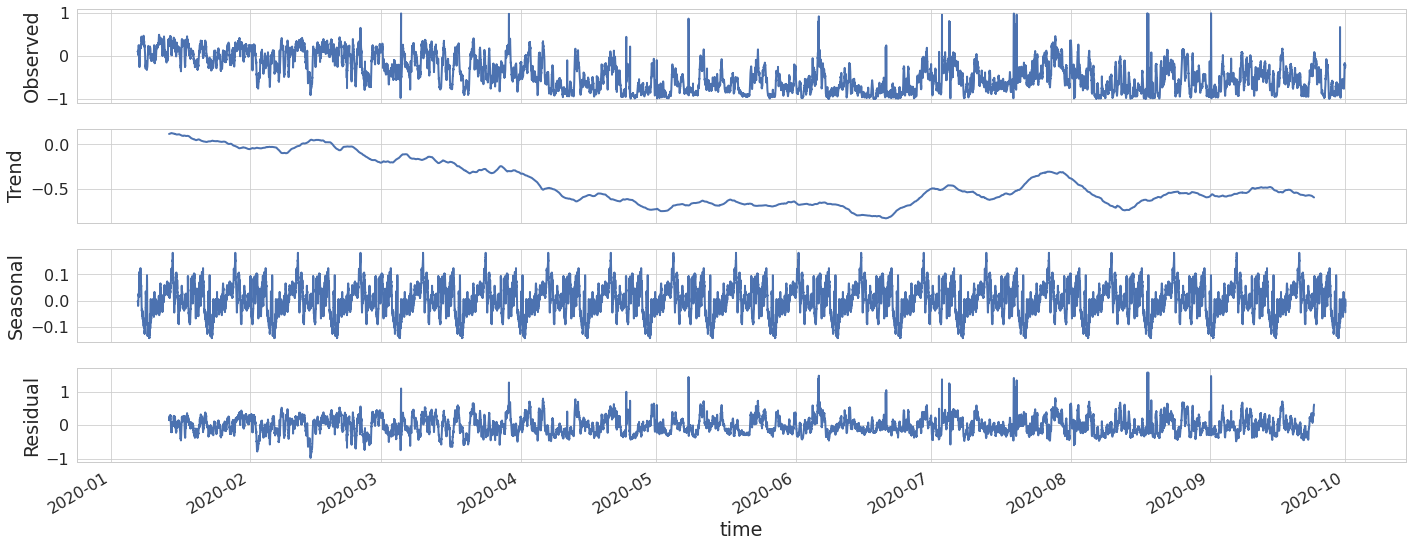

In [85]:
#@title Time series decomposition of sin(phase diff b/w Bremen and Schondorf)
# Decompose 
res = sm.tsa.seasonal_decompose(pw_angle_bremen_schondorf_2020['sin_delta'], model = 'additive', freq=1440)
# Plot
mpl.rcParams['figure.figsize'] = (20, 8)
res.plot()
plt.savefig('decomposition_sin_delta.png', dpi=600)
plt.show()

**AutoCorrelation Function**

---

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

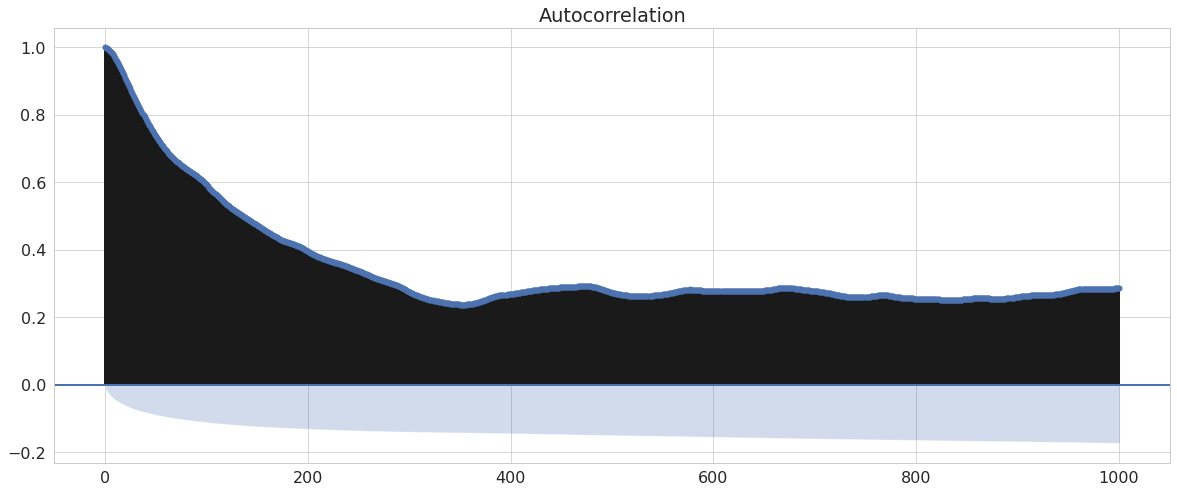

In [88]:
#@title ACF of total wind energy
plot_acf(total_wind_energy_df['total_Hochrechnung'], lags = 1000)
plt.show()

**Partial AutoCorrelation Function**

---

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

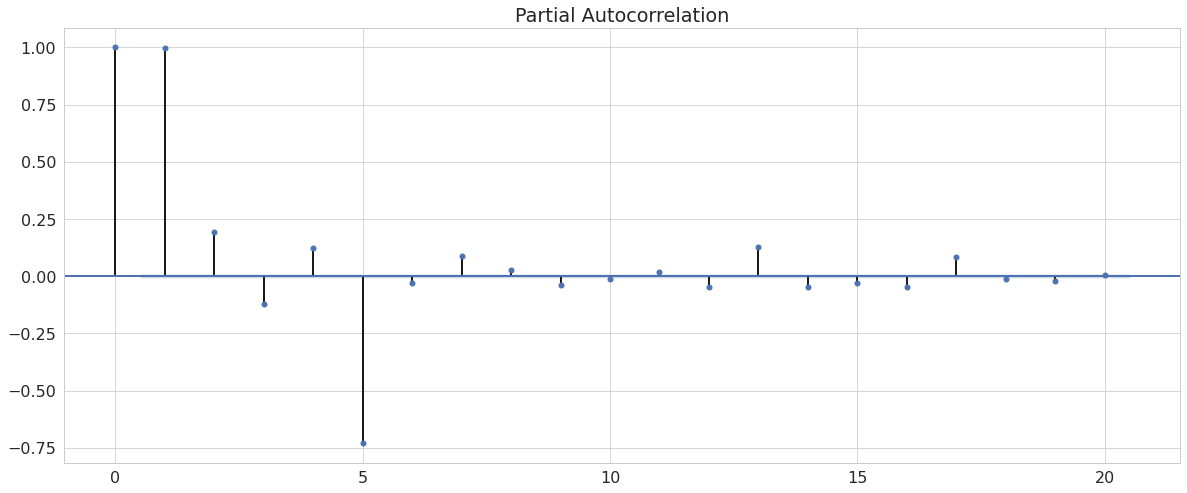

In [89]:
#@title PACF of total wind energy
plot_pacf(total_wind_energy_df['total_Hochrechnung'], lags=20)
plt.show()

**Analysis of ACF and PACF results for total wind energy data**

---

We can observe a pattern of gradual decay in the ACF which suggests that the autocorrelations are significant for a large number of lags; but perhaps the autocorrelations above the lags 5 are merely due to the propagation of the autocorrelation at lag 1. This is confirmed by the PACF plot where it has relatively large spikes in the first 5 lags before dropping off to near zero.

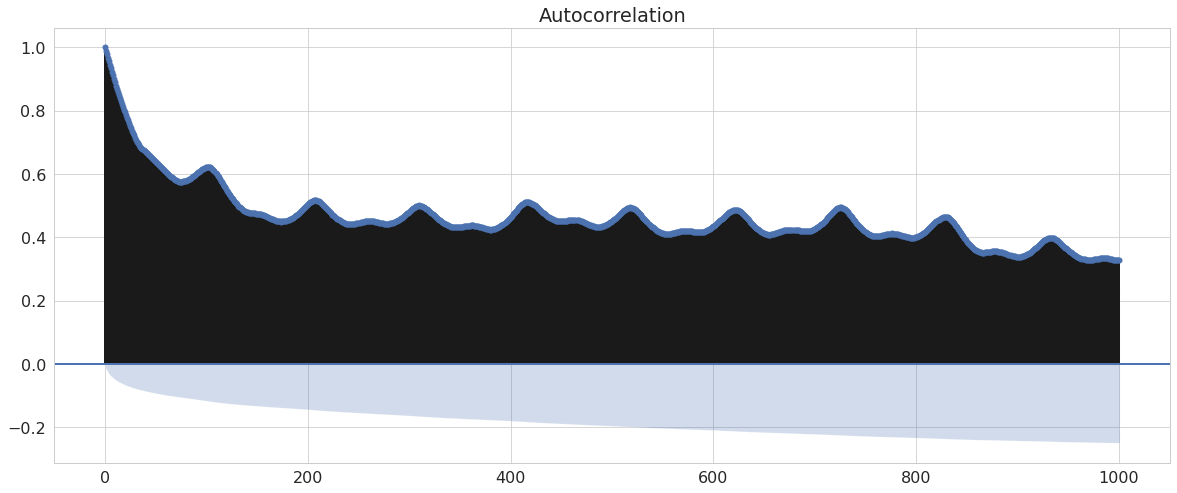

In [86]:
#@title ACF of sin(phase diff)
plot_acf(pw_angle_bremen_schondorf_2020['sin_delta'], lags = 1000)
plt.show()

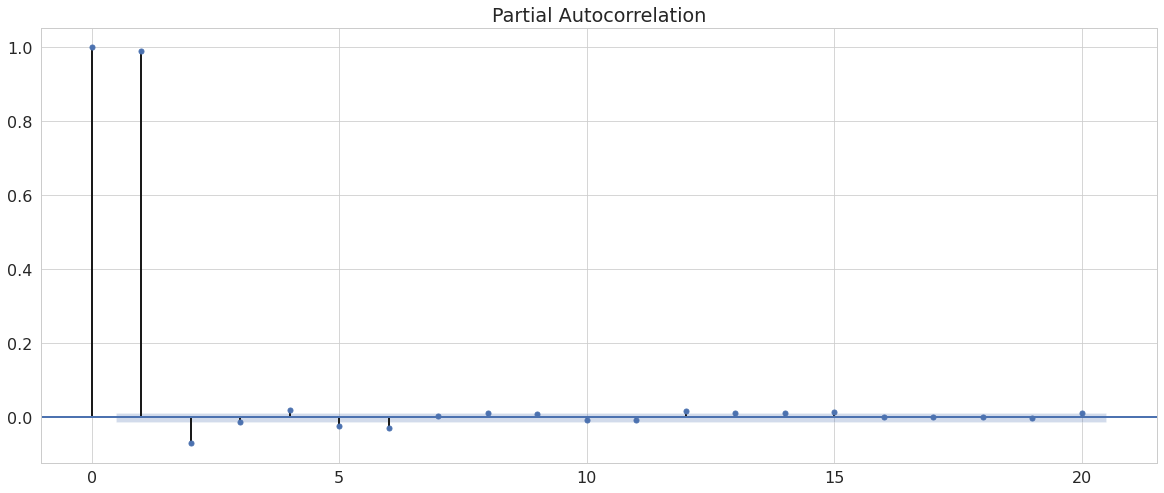

In [87]:
#@title PACF of sin(phase diff)
plot_pacf(pw_angle_bremen_schondorf_2020['sin_delta'], lags=20)
plt.show()

**Analysis of ACF and PACF results for phase angle data**

---

We can observe a pattern of decay in the ACF which suggests that the autocorrelations are significant for a large number of lags; but perhaps the autocorrelations above the lags 2 are merely due to the propagation of the autocorrelation at lag 1. This is confirmed by the PACF plot where it has relatively large spikes at the first and second lags before dropping off to near zero.

## **Parametric tests for detecting stationarity in time series data**

---

The results of test confirm the statioanrity of the time series, hence there is no need to apply transformations on the time series to make it stationary

The Augmented Dickey-Fuller Test:

An extension of the Dickey-Fuller test to test the null hypothesis that a unit root is present in an autoregressive model of a given time series and that the process is thus not stationary.

The KPSS Test
Conversely to the Dickey-Fuller family of tests, the null hypothesis assumes stationarity around a mean or a linear trend, while the alternative is the presence of a unit root.

The KPSS test is often used to complement Dickey-Fuller-type tests.

**Augmented Dickey-Fuller test (ADF)**

---

Null Hypotehsis (H0): Time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): Time series does not have a unit root, meaning it is stationary.

p-value > 0.05: Accept H0, the data has a unit root and is non-stationary

p-value ≤ 0.05: Reject H0. the data does not have a unit root and is stationary


In [98]:
#@title ADF test for phase angle data
# adf test
adfuller_result = adfuller(pw_angle_bremen_schondorf_2020['sin_delta'])

# print the results
print(f'ADF Test Statistics: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
print(f'Critial Values: {adfuller_result[4]}')

if adfuller_result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

ADF Test Statistics: -9.393401615067647
p-value: 6.469909457261807e-16
Critial Values: {'1%': -3.4305856892405817, '5%': -2.8616441679630813, '10%': -2.5668254454819275}
Series is Stationary


**KPSS test**

---

Null Hypotehsis (H0): Time series does not have a unit root, hence it is stationary.

Alternate Hypothesis (H1): Time series has a unit root and is not stationary.

p-value > 0.05: Accept H0, the data does not have a unit root and is stationary.

p-value ≤ 0.05: Reject H0. the data has a unit root and is non-stationary.

In [97]:
#@title KPSS test for phase angle data
# kpss test
# c- data is statinary around const
# ct - data is statioanry around a trend
# stats, p, lags, critical_values = kpss(pw_angle_bremen_schondorf_2020['sin_delta'], 'ct')
kpps_result = kpss(pw_angle_bremen_schondorf_2020['sin_delta'], 'ct')

# print the results
print(f'KPSS Test Statistics: {kpps_result[0]}')
print(f'p-value: {kpps_result[1]}')
print(f'Critial Values: {kpps_result[3]}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

KPSS Test Statistics: 4.535111516439977
p-value: 0.01
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


## **Combining the two time series**

In [99]:
#@title Combine the wind energy data with sin(phase diff) for performing multivariate analysis and eventually build a multivariate forecasting model
combined_df = total_wind_energy_df.join(pw_angle_bremen_schondorf_2020, how='outer')
combined_df = combined_df['2020-01-07':]
combined_df.drop(columns=['Date', 'Time', 'total_Prognose', 'Schondorf', 'Bremen', 'phase_diff', 'dt'], inplace=True)

# save the df as .pickle
combined_df_pickle = open("wind_bs_sindelta_df.pickle","wb")
pickle.dump(combined_df, combined_df_pickle)

print("Both the dataframes are combined and are stored as pickle file")

Both the dataframes are combined and are stored as pickle file


In [ ]:
#@title alternatively, read from the previously saved pickle file
combined_df_pickle = open("wind_bs_sindelta_df.pickle", "rb")
combined_df = pickle.load(combined_df_pickle)

**Testing Causation using Granger’s Causality Test**

---

Null Hypothesis (H0): Xt does not granger causes Yt.

Alternative Hypothesis (H1): Xt granger causes Yt.

p-value > 0.05: Accept H0, Implies Xt does not cause Yt.

p-value ≤ 0.05: Reject H0. Implies Xt causes Yt.

In [119]:
#@title Granger's causality test with maxlag = 20 and test = 'ssr-chi2test'
maxlag = 20

test = 'ssr-chi2test'

def grangers_causality_matrix(X_train, variables, test = test, verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(combined_df[['total_Hochrechnung', 'sin_delta']], variables = combined_df[['total_Hochrechnung', 'sin_delta']].columns)

,total_Hochrechnung_x,sin_delta_x
total_Hochrechnung_y,1.0,0.0
sin_delta_y,0.0,1.0


In [120]:
#@title CrossCorrelation between two time series
# Y and Z are numpy arrays or lists of variables 
combined_df_corr = combined_df.corr(method ='pearson')
combined_df_corr

,total_Hochrechnung,sin_delta
total_Hochrechnung,1.000000,0.680203
sin_delta,0.680203,1.000000


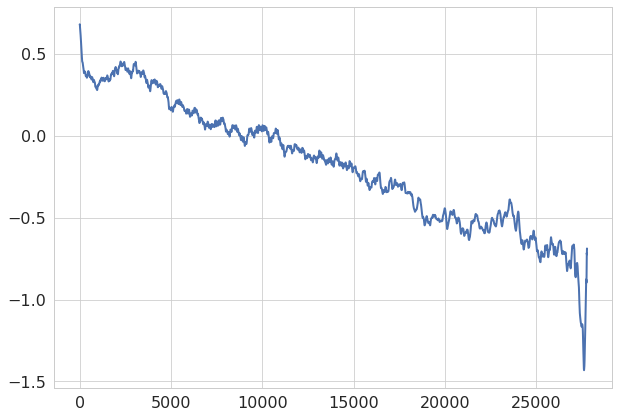

In [124]:
#@title Cross Correlation Function (CCF) plot
x = combined_df['total_Hochrechnung']
y = combined_df['sin_delta']

plt.plot(ccf(x, y))

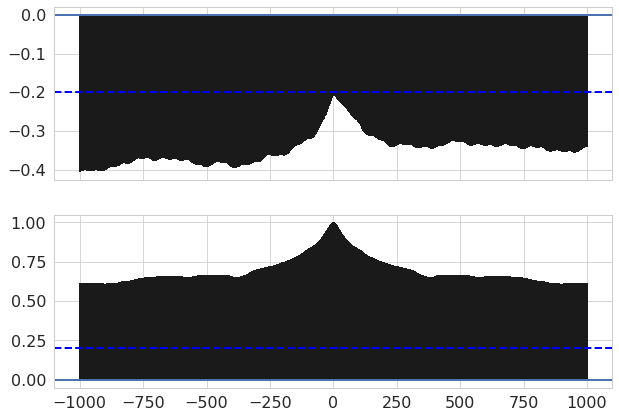

In [125]:
#@title Cross-correlation sin(phase diff) versus total wind energy
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=1000, normed=True, lw=2)
ax1.axhline(-0.2, color='blue', linestyle='dashed', lw=2)
ax1.grid(True)

ax2.acorr(x, usevlines=True, normed=True, maxlags=1000, lw=2)
ax2.axhline(0.2, color='blue', linestyle='dashed', lw=2)
ax2.grid(True)

plt.show()

Cross Correlation Function (CCF) is helpful for identifying lags of the x-variable that might be useful predictors of y-variable. The value of ccf in this case is fairly large, hence significant.

# **Forecasting sin(δ) using LSTM**

ARIMA has some limitation and the major one is that in a simple ARIMA model, it is hard to model the nonlinear relationships between variables and other one is the assumption that there is a constant standard deviation in errors in ARIMA model, which in especially in thie case might not be there. To address these limitations and other challenges in time series data we can use LSTM which is special case of Recurrent Neural Network (RNN). 

In [204]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False

In [153]:
#Separate dates for future plotting
train_dates = combined_df.index

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
df_input = combined_df[['total_Hochrechnung','sin_delta']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

array([[0.34206552, 0.55148144],
       [0.34206552, 0.55417011],
       [0.3389191 , 0.54764673],
       ...,
       [0.10656206, 0.39770829],
       [0.10857446, 0.39542791],
       [0.10740029, 0.39396071]])

In [154]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
win_length = 480
batch_size = 128
num_features = 2

features = data_scaled
target = data_scaled[:,1]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42, shuffle = False)

train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [155]:
# define Autoencoder model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 480, 128)          67072     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 480, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 480, 128)          131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 480, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 480, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [156]:
history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
170/170 [==============================] - 21s 105ms/step - loss: 0.0291 - val_loss: 0.0083
Epoch 2/50
170/170 [==============================] - 17s 101ms/step - loss: 0.0082 - val_loss: 0.0065
Epoch 3/50
170/170 [==============================] - 17s 100ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 4/50
170/170 [==============================] - 17s 99ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 5/50
170/170 [==============================] - 17s 99ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 6/50
170/170 [==============================] - 17s 100ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 7/50
170/170 [==============================] - 17s 102ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/50
170/170 [==============================] - 17s 100ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 9/50
170/170 [==============================] - 17s 100ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 10/50
170/170 [==============================] - 17s 99ms/step - loss

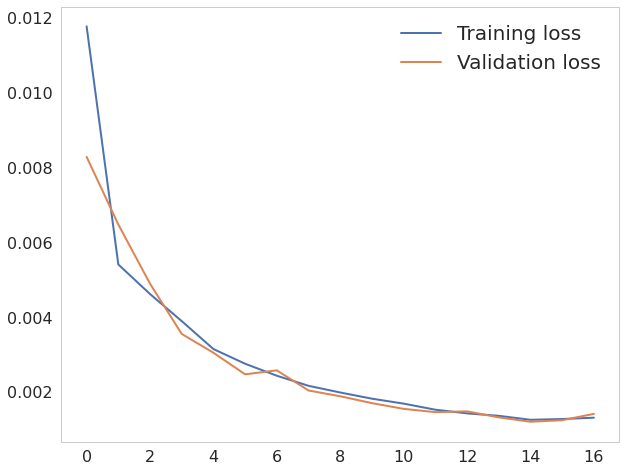

In [159]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.savefig('model_train_val_loss.png', dpi=600)
plt.show()

In [160]:
#Forecasting for the test data
predictions = model.predict_generator(test_generator)
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans_pred = scaler.inverse_transform(df_pred)
df_final = df_input[rev_trans_pred.shape[0]*-1:].reset_index(drop=True)
df_final['Pred'] = rev_trans_pred[:, 1]

In [202]:
df_final

,total_Hochrechnung,sin_delta,Pred
0,236.312,-0.124303,-0.124303
1,239.470,-0.116816,-0.116816
2,240.430,-0.144956,-0.144956
3,241.278,-0.146966,-0.146966
4,238.368,-0.160578,-0.160578
...,...,...,...
5073,192.870,-0.267427,-0.267427
5074,198.060,-0.233799,-0.233799
5075,201.750,-0.206339,-0.206339
5076,205.560,-0.210889,-0.210889


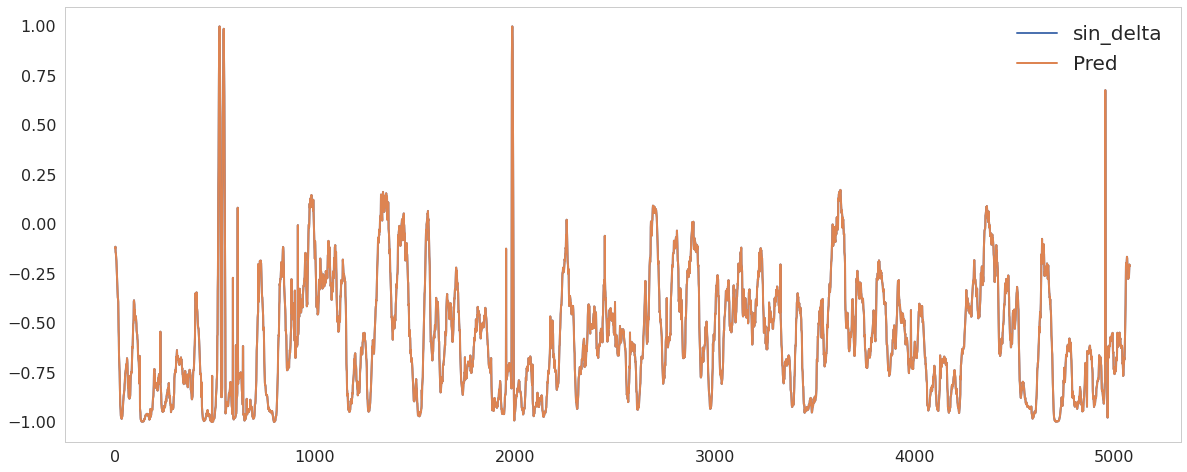

In [208]:
df_final[['sin_delta','Pred']].plot()
plt.savefig('pred_vs_actual.png', dpi=600)
plt.show()